# **Chapter 09**  
**┗ 신용카드 사기 거래 예측**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「의미있는 변수 선택」
*              - 1. 그룹 기준으로 데이터를 나눴을 때 모수가 적절한 비중으로 나눠져 들어간 것
*              - 2. 가입률 등이 줄이 잘 세워지고, 추가적으로 그 gap이 많이 벌어지는 변수
* 🥈Session 2 - 「사기 거래 특성 파악」
* 🥇Session 3 - 「ML 활용 사기 거래 예측」

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter09')
# '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter09' ← 변경X
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter09'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 💳😠 (서비스 운영자, Risk management, 이상거래탐지)

```
카드사 A는 최근 비트코인 열풍으로 수수료 거래 금액이 늘어 좋으면서도  한 편으로 골치를 썩고 있다. 비트코인 결제를 신용카드로 결제하여 많은  
수수료를 얻어가고 있지만, 그만큼 사기거래가 발생하고 처리해달라는 고객 Claim이 수도 없이 쏟아지기 때문이다. 이에 카드사는 사기거래로  
예측되는 거래건에 경우 거래를 제한하고자 한다.
```  

> **데이터 살펴보기**

* 거래 기준 Spending data
* 데이터 명세 ⬇

|account_age_days| transaction_amt| transaction_adj_amt|historic_velocity|ip_address|user_agent|
|:---:|:---:|:---:|:---:|:---:|:---:|
|계좌 생성후 지난일|거래금액|거래 조정 금액|과거 거래금액|IP주소|사용환경|
|email_domain|phone_number|billing_city|billing_postal|billing_state|card_bin|
|email 도메인|전화번호|청구도시|청구우편번호|청구주|카드bin번호(앞6자리)|
|currency|cvv|signature_image|transaction_type|transaction_env|EVENT_TIMESTAMP|applicant_name| 
|통화|CVV|서명이미지|거래종류|거래환경|거래일자|
billing_address|merchant_id|locale|tranaction_initiate|days_since_last_logon|inital_amount|
|청구주소|상점ID|지역|거래초기코드|마지막로그인후경과일|초기잔액|
|EVENT_LABEL|
|사기여부|

In [2]:
# ▶ Data read
import pandas as pd 
df = pd.read_csv('chapter09_credit_fraud.csv')
df.head(10)

account_age_days  transaction_amt  transaction_adj_amt  historic_velocity  \
0            3371.0           2167.0                 56.0             2572.0   
1            2714.0           2045.0                 48.0             4517.0   
2            6987.0           2892.0                 61.0             5007.0   
3            2712.0           3040.0                 28.0             6022.0   
4            3598.0           2976.0                 66.0             2600.0   
5            2212.0           1854.0                 50.0             4539.0   
6            4168.0           3528.0                 59.0             5557.0   
7            6034.0           3177.0                 53.0             6296.0   
8            5721.0           2970.0                 55.0             5732.0   
9            3278.0           1574.0                 72.0             3958.0   

        ip_address                                         user_agent  \
0    154.68.49.124  Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...   
1    39.131.125.85  Opera/9.76.(X11; Linux i686; mi-NZ) Presto/2.9...   
2   166.245.194.83  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...   
3    100.1.217.216  Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_3 ...   
4   113.156.65.245  Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...   
5  208.245.197.202  Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...   
6  199.181.138.165  Opera/9.50.(Windows 95; lij-IT) Presto/2.9.164...   
7   58.161.134.204  Opera/9.46.(X11; Linux x86_64; km-KH) Presto/2...   
8   37.103.250.147  Mozilla/5.0 (Macintosh; Intel Mac OS X 10 9_0)...   
9    125.193.157.2  Mozilla/5.0 (iPad; CPU iPad OS 10_3_4 like Mac...   

            email_domain           phone_number        billing_city  \
0        perez-garza.com           878-111-5140          Woodsburgh   
1      mcneil-ortega.com          (002)736-0139          West Kevin   
2     davis-calderon.com      (983)585-2863x652         Lorichester   
3           rose-lee.org  +1-678-897-3420x60738        Stephenmouth   
4               nash.net    (013)204-1766x92641      New Brianmouth   
5     merritt-bolton.com        +1-521-593-1520           Graymouth   
6              hodge.com      798-318-1561x1133          Goodmanton   
7    henderson-david.com           621.175.0084         Rogersshire   
8  espinoza-robinson.com      711-053-8116x7882             Kimbury   
9         frost-kidd.com       813-713-6438x658  East Christinefort   

   billing_postal  ... transaction_env      EVENT_TIMESTAMP   applicant_name  \
0         96336.0  ...               X  2020-12-29 09:05:51     Linda Wright   
1         78083.0  ...               W  2021-06-22 18:05:06     Terri Rivera   
2         83236.0  ...               X  2021-05-10 13:48:38       Sarah Gray   
3         78364.0  ...               N  2021-03-11 07:36:40  Valerie Jenkins   
4         77499.0  ...               G  2021-03-27 06:13:35      Amy Coleman   
5           552.0  ...               D  2021-01-07 20:51:06   Maureen Garcia   
6         91927.0  ...               C  2021-07-14 22:22:51     Nicole Hodge   
7         40459.0  ...               U  2020-12-25 14:21:35   Regina Garrett   
8         78204.0  ...               G  2021-03-24 06:57:09  Richard Dickson   
9         92649.0  ...               D  2021-02-05 13:17:46      Maria Brown   

                   billing_address  merchant_id  locale tranaction_initiate  \
0                4684 Sharon Ranch  066-82-8795  niu_NZ                   O   
1                7642 Allison Ramp  669-99-9459  apn_IN                   J   
2                4948 Lisa Passage  086-41-1624   dv_MV                   T   
3                 1616 Little Camp  669-97-4021  byn_ER                   M   
4                 149 Harris Rapid  088-21-6329  the_NP                   K   
5              9406 Phillips Spurs  334-79-0930  ayc_PE                   I   
6  82346 Ramirez Viaduct Suite 561  013-09-1555   iu_CA                   P   
7    39904 Mcdaniel Lod


## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 사기거래로 인한 고객 Claim 증가, 브랜드 이미지 감소, 고객 탈퇴
```  

> **기대효과**

```
▶ 사기거래 거래 제한으로 고객 Claim 감소, 브랜드 이미지 회복, 고객 방어
```

> **해결방안**

```
▶ 카드 Spending data 활용 사기거래 예측
▶ Session 1 🥉
 - Data 전처리와 의미있는 변수에 대해 고민해보고 탐색
 - 현업에서는 어떤 데이터를 가지고 시작할지가 분석 프로젝트의 첫번째 단계(데이터 설계)
 - 따라서, 사기 거래와 정상 거래를 명확히 구분할 수 있는 의미 있는 변수를 사전에 요청하는 것이 좋다 -> 모댈링 성능도 좋아짐
▶ Session 2 🥈
 - Numeric(연속형, 숫자형) 변수와 Categorical(범주형) 변수에 대해 탐색
▶ Session 3 🥇
 - ML 알고리즘을 활용하여 사기거래 예측
```

> **성과측정**  

```
▶ 모델 적용 전/후 사기거래 Claim 감소 건수
```

> **현업적용**  

```
▶ 카드 Spending data 실시간 수집 -> 모델에 input하기 위해선 모델 학습 시 사용했던 데이터와 동일한 형식의 columns로 구성된 data mart 구축 필요
▶ 거래 발생시 마다 모든 거래 Data 모델 Input 후 사기거래의심 건수 추출 -> 실시간으로 모델이 예측해내야 함(속도 중요!)
▶ 사기 가능성 높은 거래 건수에 대해서 제한조치 실행
```

> **주요 코드 미리 살펴보기**

```
▶ session 1 → split, apply(lamda x:), list.append
▶ session 2 → np.where, reset_index() -> index 값에 필요한 column 정보가 들어있다면 drop=True 사용하면 안 됨, sns.distplot -> numeric/연속형 변수, sns.catplot 
▶ session 3 → train_test_split, classification_report, roc_auc_score
```


## **🥉Session 1**  
**┗ 의미있는 변수 선택**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [3]:
# ▶ Data 형태 확인
# ▶ 150,000  row, 26 col로 구성됨
print('df', df.shape)

df (150000, 26)


In [4]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   account_age_days       149892 non-null  float64
 1   transaction_amt        149870 non-null  float64
 2   transaction_adj_amt    149886 non-null  float64
 3   historic_velocity      149885 non-null  float64
 4   ip_address             149873 non-null  object 
 5   user_agent             149887 non-null  object 
 6   email_domain           149910 non-null  object 
 7   phone_number           149873 non-null  object 
 8   billing_city           149884 non-null  object 
 9   billing_postal         149876 non-null  float64
 10  billing_state          149887 non-null  object 
 11  card_bin               149872 non-null  float64
 12  currency               149892 non-null  object 
 13  cvv                    149877 non-null  object 
 14  signature_image        149895 non-nu

In [5]:
# ▶ Null 값 확인
# null 데이터가 많은 경우 fillna/replace 함수 등을 통해 치환해서 사용하기
# 아래처럼 null 데이터가 적은 경우 삭제한 후 사용하기
print(df.isnull().sum())

account_age_days         108
transaction_amt          130
transaction_adj_amt      114
historic_velocity        115
ip_address               127
user_agent               113
email_domain              90
phone_number             127
billing_city             116
billing_postal           124
billing_state            113
card_bin                 128
currency                 108
cvv                      123
signature_image          105
transaction_type         116
transaction_env          123
EVENT_TIMESTAMP          112
applicant_name           143
billing_address          134
merchant_id              107
locale                   134
tranaction_initiate      126
days_since_last_logon    136
inital_amount            128
EVENT_LABEL                0
dtype: int64


In [6]:
# ▶ 결측치 행 모두 제거 (※ 결측치 데이터가 작아서 일괄 drop)
df=df.dropna(axis=0) # 26개 columns 중 하나라도 na가 들어있는 행은 삭제

In [ ]:
print(df.isnull().sum())

In [ ]:
# 약 3000 rows 삭제됨 -> 전체 데이터셋의 2% (3000/150000)
df.shape

In [7]:
# ▶ Outlier 확인, 음수값 확인
df.describe()

account_age_days  transaction_amt  transaction_adj_amt  \
count     147000.000000    147000.000000        147000.000000   
mean        4645.817224      2521.343592            54.208837   
std         1153.792072       604.680167            10.068128   
min            1.000000         5.000000             1.000000   
25%         3824.000000      2103.000000            48.000000   
50%         4668.000000      2543.000000            55.000000   
75%         5476.000000      2951.000000            61.000000   
max         9119.000000      4999.000000            99.000000   

       historic_velocity  billing_postal       card_bin  \
count      147000.000000   147000.000000  147000.000000   
mean         4702.388673    50179.458129   41834.312320   
std          1188.255402    28389.219411   10082.094148   
min            50.000000      503.000000    6040.000000   
25%          3872.000000    25298.000000   35386.000000   
50%          4729.000000    50072.000000   42086.000000   
75%          5548.000000    74346.000000   47373.000000   
max          9999.000000    99950.000000   67639.000000   

       days_since_last_logon  inital_amount  
count          147000.000000  147000.000000  
mean               49.858524    7996.856367  
std                29.208844    4047.922681  
min                 0.000000    1000.000000  
25%                24.000000    4485.000000  
50%                50.000000    7999.000000  
75%                75.000000   11495.000000  
max               100.000000   15000.000000

In [8]:
print(df['user_agent'].head(1))

0    Opera/9.81.(Windows NT 10.0; ht-HT) Presto/2.9...
Name: user_agent, dtype: object


In [9]:
# ▶ user_agent 브라우저 name 선택
df['user_agent'] = df['user_agent'].apply(lambda x: x.split('/')[0])

In [10]:
df.head(3)

account_age_days  transaction_amt  transaction_adj_amt  historic_velocity  \
0            3371.0           2167.0                 56.0             2572.0   
1            2714.0           2045.0                 48.0             4517.0   
2            6987.0           2892.0                 61.0             5007.0   

       ip_address user_agent        email_domain       phone_number  \
0   154.68.49.124      Opera     perez-garza.com       878-111-5140   
1   39.131.125.85      Opera   mcneil-ortega.com      (002)736-0139   
2  166.245.194.83    Mozilla  davis-calderon.com  (983)585-2863x652   

  billing_city  billing_postal  ... transaction_env      EVENT_TIMESTAMP  \
0   Woodsburgh         96336.0  ...               X  2020-12-29 09:05:51   
1   West Kevin         78083.0  ...               W  2021-06-22 18:05:06   
2  Lorichester         83236.0  ...               X  2021-05-10 13:48:38   

  applicant_name    billing_address  merchant_id  locale tranaction_initiate  \
0   Linda Wright  4684 Sharon Ranch  066-82-8795  niu_NZ                   O   
1   Terri Rivera  7642 Allison Ramp  669-99-9459  apn_IN                   J   
2     Sarah Gray  4948 Lisa Passage  086-41-1624   dv_MV                   T   

  days_since_last_logon inital_amount EVENT_LABEL  
0                  59.0       13646.0       legit  
1                   0.0       11930.0       legit  
2                  83.0        7412.0       legit  

[3 rows x 26 columns]

In [11]:
df['EVENT_LABEL'].value_counts()

legit    138996
fraud      8004
Name: EVENT_LABEL, dtype: int64

In [12]:
# ▶ 5% 사기거래률 -> 사기는 5%도 매우 치명적
(8004 / (8004 + 138996) ) * 100

5.444897959183673

### · 의미있는 변수 선택  
---
* 의미있는 변수란  
  - 해당 변수에 의해서 예측하고자 하는 데이터가 *잘 구분* 되어지는 변수  
  

* Numeric 변수
  - 연속형 변수는 구간화를 통해 범주형 변수로 변경하고, *잘 구분* 되어지는지 확인   
  (※ 평균 사기거래률 대비 그룹핑한 그룹의 사기거래율이 차이가 나는 것)
  
* Categorical 변수
  - 각 그룹별 예측하고자 하는 데이터가 잘 나눠지는지 확인  
  (※ 각 그룹마다 사기거래율의 차이가 나는 것)


In [13]:
# ▶ 하나의 Col에 대한 데이터 타입 확인 
df['account_age_days'].dtypes

dtype('float64')

In [ ]:
df['currency'].dtypes

In [ ]:
df.columns

In [14]:
# ▶ numeric, categorical value 나누기
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate', 'EVENT_LABEL']
numeric_list : ['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity', 'billing_postal', 'card_bin', 'days_since_last_logon', 'inital_amount']


In [ ]:
# 실제 잘 들어갔는지 확인
df[categoical_list].head(5)

## **🥈Session 2**  
**┗ 사기 거래 특성 파악**  
---

### · Numeric 변수 
---

In [15]:
print("numeric_list :", numeric_list)

numeric_list : ['account_age_days', 'transaction_amt', 'transaction_adj_amt', 'historic_velocity', 'billing_postal', 'card_bin', 'days_since_last_logon', 'inital_amount']


In [16]:
# ▶ numeric_list df만 출력 
df[numeric_list]

account_age_days  transaction_amt  transaction_adj_amt  \
0                 3371.0           2167.0                 56.0   
1                 2714.0           2045.0                 48.0   
2                 6987.0           2892.0                 61.0   
3                 2712.0           3040.0                 28.0   
4                 3598.0           2976.0                 66.0   
...                  ...              ...                  ...   
149995            3986.0           2890.0                 57.0   
149996            5834.0           1875.0                 61.0   
149997            4781.0           3371.0                 48.0   
149998            6085.0           2306.0                 59.0   
149999            5181.0           3148.0                 68.0   

        historic_velocity  billing_postal  card_bin  days_since_last_logon  \
0                  2572.0         96336.0   40771.0                   59.0   
1                  4517.0         78083.0   24480.0                    0.0   
2                  5007.0         83236.0   37778.0                   83.0   
3                  6022.0         78364.0   55790.0                   24.0   
4                  2600.0         77499.0   37370.0                   21.0   
...                   ...             ...       ...                    ...   
149995             4544.0         34817.0   30017.0                   99.0   
149996             4369.0         35879.0   65507.0                   85.0   
149997             5135.0         84167.0   47079.0                   22.0   
149998             4846.0         80391.0   25891.0                   70.0   
149999             4987.0         89836.0   35255.0                   63.0   

        inital_amount  
0             13646.0  
1             11930.0  
2              7412.0  
3              4623.0  
4              1905.0  
...               ...  
149995         6681.0  
149996         2402.0  
149997         4113.0  
149998         4531.0  
149999         5923.0  

[147000 rows x 8 columns]

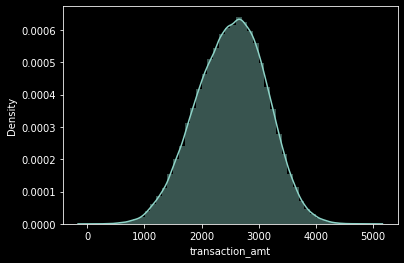

In [19]:
# ▶ transaction_amt(거래 금액)에 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['transaction_amt']);
# 정규분포와 가까운 형태 -> 구간화 용이

In [21]:
# ▶ 구간화: 3~4개의 그룹으로 나누는 것을 추천
import numpy as np
df['transaction_amt_gp'] = np.where (df['transaction_amt'] <= 2000, 1, 
                           np.where(df['transaction_amt'] <= 3000, 2, 3))

df[['transaction_amt','transaction_amt_gp']]

transaction_amt  transaction_amt_gp
0                2167.0                   2
1                2045.0                   2
2                2892.0                   2
3                3040.0                   3
4                2976.0                   2
...                 ...                 ...
149995           2890.0                   2
149996           1875.0                   1
149997           3371.0                   3
149998           2306.0                   2
149999           3148.0                   3

[147000 rows x 2 columns]

In [22]:
# ▶ 구간화에 따른 사기거래 -> 항상 df로 바꿔주는 것이 좋다
df.groupby(['transaction_amt_gp', 'EVENT_LABEL'])['transaction_amt'].count() # transaction_amt 외에 어떤 변수를 넣어도 ok

transaction_amt_gp  EVENT_LABEL
1                   fraud            353
                    legit          29420
2                   fraud           4825
                    legit          79588
3                   fraud           2826
                    legit          29988
Name: transaction_amt, dtype: int64

In [23]:
# ▶ 그룹에 따라서 사기거래률이 적절하게 나눠졌다고 볼 수 있다. (※ 평균 사기거래율 5%)
print("gp1 :", 353 / (353+29420))
print("gp2 :", 4825 / (4825+79588))
print("gp3 :", 2826 / (2826+29988))

gp1 : 0.011856379941557787
gp2 : 0.057159442266001684
gp3 : 0.08612177729018101


In [24]:
# ▶ DataFrame 형태로 만들기 (1단계)
df_tran = pd.DataFrame(df.groupby(['transaction_amt_gp', 'EVENT_LABEL'])['EVENT_TIMESTAMP'].count()).reset_index()
df_tran.head(5)

transaction_amt_gp EVENT_LABEL  EVENT_TIMESTAMP
0                   1       fraud              353
1                   1       legit            29420
2                   2       fraud             4825
3                   2       legit            79588
4                   3       fraud             2826

In [25]:
# ▶ DataFrame 형태로 만들기 (2단계)
df_pivot = pd.pivot_table(df_tran,                         # 피벗할 데이터프레임
                      index = 'transaction_amt_gp',        # 행 위치에 들어갈 열
                      columns = 'EVENT_LABEL',             # 열 위치에 들어갈 열
                      values = 'EVENT_TIMESTAMP')          # 데이터로 사용할 열 

df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']
df_pivot.head(5)

transaction_amt_gp  fraud  legit
0                   1    353  29420
1                   2   4825  79588
2                   3   2826  29988

In [26]:
# ▶ DataFrame 형태로 만들기 (3단계)
df_pivot['ratio'] =   round((df_pivot.iloc[:,1] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot
# transaction_adj_amt 변수가 더 critical 변수 -> group1의 모수가 적긴 하지만 사기거래율 36.4%

transaction_amt_gp  fraud  legit  ratio
0                   1    353  29420    1.2
1                   2   4825  79588    5.7
2                   3   2826  29988    8.6

### · Categorical 변수 
---

In [ ]:
df.head(2)

account_age_days  transaction_amt  transaction_adj_amt  historic_velocity  \
0            3371.0           2167.0                 56.0             2572.0   
1            2714.0           2045.0                 48.0             4517.0   

      ip_address user_agent       email_domain   phone_number billing_city  \
0  154.68.49.124      Opera    perez-garza.com   878-111-5140   Woodsburgh   
1  39.131.125.85      Opera  mcneil-ortega.com  (002)736-0139   West Kevin   

   billing_postal  ...      EVENT_TIMESTAMP  applicant_name  \
0         96336.0  ...  2020-12-29 09:05:51    Linda Wright   
1         78083.0  ...  2021-06-22 18:05:06    Terri Rivera   

     billing_address  merchant_id  locale tranaction_initiate  \
0  4684 Sharon Ranch  066-82-8795  niu_NZ                   O   
1  7642 Allison Ramp  669-99-9459  apn_IN                   J   

  days_since_last_logon inital_amount EVENT_LABEL transaction_amt_gp  
0                  59.0       13646.0       legit                  2  
1                   0.0       11930.0       legit                  2  

[2 rows x 27 columns]

In [ ]:
print("categoical_list :", categoical_list)

categoical_list : ['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate', 'EVENT_LABEL']


In [ ]:
df[categoical_list].head(5)

ip_address user_agent        email_domain           phone_number  \
0   154.68.49.124      Opera     perez-garza.com           878-111-5140   
1   39.131.125.85      Opera   mcneil-ortega.com          (002)736-0139   
2  166.245.194.83    Mozilla  davis-calderon.com      (983)585-2863x652   
3   100.1.217.216    Mozilla        rose-lee.org  +1-678-897-3420x60738   
4  113.156.65.245    Mozilla            nash.net    (013)204-1766x92641   

     billing_city   billing_state currency cvv signature_image  \
0      Woodsburgh      California      cad   D               F   
1      West Kevin         Florida      cad   X               X   
2     Lorichester            Utah      cad   X               Q   
3    Stephenmouth        Virginia      usd   G               G   
4  New Brianmouth  South Carolina      cad   X               F   

  transaction_type transaction_env      EVENT_TIMESTAMP   applicant_name  \
0                U               X  2020-12-29 09:05:51     Linda Wright   
1                H               W  2021-06-22 18:05:06     Terri Rivera   
2                X               X  2021-05-10 13:48:38       Sarah Gray   
3                C               N  2021-03-11 07:36:40  Valerie Jenkins   
4                F               G  2021-03-27 06:13:35      Amy Coleman   

     billing_address  merchant_id  locale tranaction_initiate EVENT_LABEL  
0  4684 Sharon Ranch  066-82-8795  niu_NZ                   O       legit  
1  7642 Allison Ramp  669-99-9459  apn_IN                   J       legit  
2  4948 Lisa Passage  086-41-1624   dv_MV                   T       legit  
3   1616 Little Camp  669-97-4021  byn_ER                   M       legit  
4   149 Harris Rapid  088-21-6329  the_NP                   K       legit

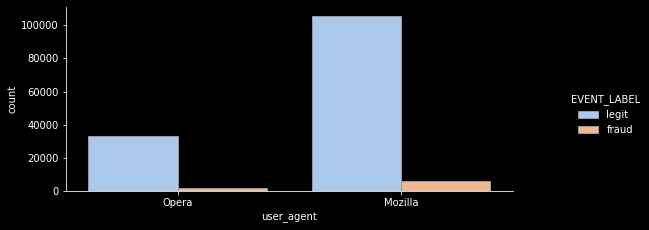

In [27]:
# ▶ User agent(인터넷 브라우저 사용환경)에 따른 사기거래율 비교하기
sns.catplot(x="user_agent", hue="EVENT_LABEL", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [28]:
cat_val='user_agent'

# ▶ 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'EVENT_LABEL'])['EVENT_TIMESTAMP'].count()).reset_index()
df_tran.head(5)

# ▶ 2단계
df_pivot = pd.pivot_table(df_tran,                  # 피벗할 데이터프레임
                      index = cat_val,              # 행 위치에 들어갈 열
                      columns = 'EVENT_LABEL',      # 열 위치에 들어갈 열
                      values = 'EVENT_TIMESTAMP')   # 데이터로 사용할 열 
# ▶ 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ 4단계
df_pivot['ratio'] =   round((df_pivot.iloc[:,1] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot
# 단독으로는 의미없는 변수 -> 알고리즘에 넣었을 때 다른 변수와 상호작용 있울 수도

user_agent  fraud   legit  ratio
0    Mozilla   6121  105492    5.5
1      Opera   1883   33504    5.3

In [29]:
# ▶ currency(거래 통화) 구성 여부
df['currency'].value_counts()

cad    111543
usd     31151
eur      4306
Name: currency, dtype: int64

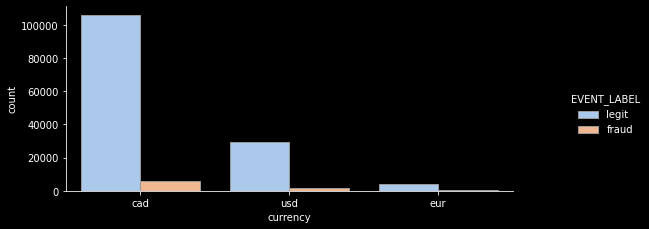

In [30]:
# ▶ currency(거래 통화)에 따른 사기거래율 비교
sns.catplot(x="currency", hue="EVENT_LABEL", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)

In [31]:
cat_val='currency'

# ▶ 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'EVENT_LABEL'])['EVENT_TIMESTAMP'].count()).reset_index()
df_tran.head(5)

# ▶ 2단계
df_pivot = pd.pivot_table(df_tran,                   # 피벗할 데이터프레임
                      index = cat_val,               # 행 위치에 들어갈 열
                      columns = 'EVENT_LABEL',       # 열 위치에 들어갈 열
                      values = 'EVENT_TIMESTAMP')    # 데이터로 사용할 열 
# ▶ 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ 4단계
df_pivot['ratio'] =   round((df_pivot.iloc[:,1] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

currency  fraud   legit  ratio
0      cad   5674  105869    5.1
1      eur    443    3863   10.3
2      usd   1887   29264    6.1

In [ ]:
# ip_address, email_domain, merchant_id 등은 모두가 unique한 값을 갖고 있기때문에 모델링에서 제외해도 됨
# 고객 개인 정보는 grouping되거나 분류되기 힘들기 때문에 categorical 변수에는 의미 있는 변수가 많지 않은 것 같음
cat_val='transaction_type'

# ▶ 1단계
df_tran = pd.DataFrame(df.groupby([cat_val, 'EVENT_LABEL'])['EVENT_TIMESTAMP'].count()).reset_index()
df_tran.head(5)

# ▶ 2단계
df_pivot = pd.pivot_table(df_tran,                   # 피벗할 데이터프레임
                      index = cat_val,               # 행 위치에 들어갈 열
                      columns = 'EVENT_LABEL',       # 열 위치에 들어갈 열
                      values = 'EVENT_TIMESTAMP')    # 데이터로 사용할 열 
# ▶ 3단계
df_pivot = df_pivot.reset_index()
df_pivot.columns.names=['']

# ▶ 4단계
df_pivot['ratio'] =   round((df_pivot.iloc[:,1] / (df_pivot.iloc[:,1] + df_pivot.iloc[:,2])) * 100,1)
df_pivot

In [ ]:
# count 수가 높으면서 사기거래율도 높은 코드가 있는지 확인(S ~ I)
df_pivot.sort_values(by=['ratio'], ascending=False)

## **🥇Session 3**  
**┗ ML 활용 사기 거래 예측**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [ ]:
df.head(5)

account_age_days  transaction_amt  transaction_adj_amt  historic_velocity  \
0            3371.0           2167.0                 56.0             2572.0   
1            2714.0           2045.0                 48.0             4517.0   
2            6987.0           2892.0                 61.0             5007.0   
3            2712.0           3040.0                 28.0             6022.0   
4            3598.0           2976.0                 66.0             2600.0   

       ip_address user_agent        email_domain           phone_number  \
0   154.68.49.124      Opera     perez-garza.com           878-111-5140   
1   39.131.125.85      Opera   mcneil-ortega.com          (002)736-0139   
2  166.245.194.83    Mozilla  davis-calderon.com      (983)585-2863x652   
3   100.1.217.216    Mozilla        rose-lee.org  +1-678-897-3420x60738   
4  113.156.65.245    Mozilla            nash.net    (013)204-1766x92641   

     billing_city  billing_postal  ...      EVENT_TIMESTAMP   applicant_name  \
0      Woodsburgh         96336.0  ...  2020-12-29 09:05:51     Linda Wright   
1      West Kevin         78083.0  ...  2021-06-22 18:05:06     Terri Rivera   
2     Lorichester         83236.0  ...  2021-05-10 13:48:38       Sarah Gray   
3    Stephenmouth         78364.0  ...  2021-03-11 07:36:40  Valerie Jenkins   
4  New Brianmouth         77499.0  ...  2021-03-27 06:13:35      Amy Coleman   

     billing_address  merchant_id  locale tranaction_initiate  \
0  4684 Sharon Ranch  066-82-8795  niu_NZ                   O   
1  7642 Allison Ramp  669-99-9459  apn_IN                   J   
2  4948 Lisa Passage  086-41-1624   dv_MV                   T   
3   1616 Little Camp  669-97-4021  byn_ER                   M   
4   149 Harris Rapid  088-21-6329  the_NP                   K   

  days_since_last_logon inital_amount EVENT_LABEL transaction_amt_gp  
0                  59.0       13646.0       legit                  2  
1                   0.0       11930.0       legit                  2  
2                  83.0        7412.0       legit                  3  
3                  24.0        4623.0       legit                  1  
4                  21.0        1905.0       legit                  3  

[5 rows x 27 columns]

In [ ]:
# ▶ Train/Test data에는 문자(str)형태로 이루어진 데이터를 Input 할 수 없음
# ▶ Model에서 이해할 수 있는 1, 0으로 Target Data를 변경
import numpy as np
df['EVENT_LABEL']=np.where(df['EVENT_LABEL']=='fraud', 1, 0)
df['EVENT_LABEL'].value_counts()

0    138996
1      8004
Name: EVENT_LABEL, dtype: int64

In [ ]:
# ▶ 모델링을 학습하기 위한 Feature(X)와 Y데이터를 구분하는 단계 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['EVENT_TIMESTAMP','EVENT_LABEL', 'transaction_amt_gp'], axis=1)
Y=df['EVENT_LABEL']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(102900, 24)
(102900,)
(44100, 24)
(44100,)


In [ ]:
# ▶ Label encoding이전 범주형 변수 리스트 확인
print(categoical_list)

['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate', 'EVENT_LABEL']


In [ ]:
# ▶ 사용하지 않을 카테고리형 변수는 리스트에서 제외
categoical_list.remove('EVENT_LABEL')
categoical_list.remove('EVENT_TIMESTAMP')

In [ ]:
print(categoical_list)

['ip_address', 'user_agent', 'email_domain', 'phone_number', 'billing_city', 'billing_state', 'currency', 'cvv', 'signature_image', 'transaction_type', 'transaction_env', 'applicant_name', 'billing_address', 'merchant_id', 'locale', 'tranaction_initiate']


In [ ]:
# ▶ Categorical(범주형) 변수는 One-hot-encoding or Label-encoding을 통해 숫자형 변수로 변경해야함
# ▶ One-hot-encoding은 차원이 많은 변수에는 불리, Label-encoding은 회귀관련 알고리즘에서는 사용 어려움.(※Tree 계열 알고리즘에서는 사용 가능)
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

ip_address
user_agent
email_domain
phone_number
billing_city
billing_state
currency
cvv
signature_image
transaction_type
transaction_env
applicant_name
billing_address
merchant_id
locale
tranaction_initiate


In [ ]:
x_train[categoical_list].head(3)

ip_address  user_agent  email_domain  phone_number  billing_city  \
89642        10309           0          1376         10886          2999   
135935       11288           0          2124          8418          4578   
37384         9485           1          7092          1569          8583   

        billing_state  currency  cvv  signature_image  transaction_type  \
89642              28         0    8                5                22   
135935             31         2    6                7                 6   
37384              25         0   23               22                 7   

        transaction_env  applicant_name  billing_address  merchant_id  locale  \
89642                 5            1377            34027         3920     137   
135935               23           86291            92551        82525      66   
37384                 6           56297            26333        67128     223   

        tranaction_initiate  
89642                    16  
135935                   12  
37384                    13

In [ ]:
x_test[categoical_list].head(3)

ip_address  user_agent  email_domain  phone_number  billing_city  \
91985         1309           1          5437          6610          2523   
139392        4886           0          2437          2844           134   
99562         8760           0          5718          9333          2619   

        billing_state  currency  cvv  signature_image  transaction_type  \
91985               9         0   17                3                 1   
139392             21         0    6               20                23   
99562              39         0   22                7                 6   

        transaction_env  applicant_name  billing_address  merchant_id  locale  \
91985                20           51486           129672       130492       3   
139392               22           37790            25082        12684     283   
99562                 5           78712            93606        29211      43   

        tranaction_initiate  
91985                    17  
139392                   17  
99562                    24

### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [ ]:
# ▶ 학습
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state = 123456, max_depth=8, n_estimators=500)
rfc.fit(x_train, y_train)

# ▶ 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     97297
           1       0.97      0.34      0.51      5603

    accuracy                           0.96    102900
   macro avg       0.97      0.67      0.74    102900
weighted avg       0.96      0.96      0.96    102900

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41699
           1       0.96      0.32      0.47      2401

    accuracy                           0.96     44100
   macro avg       0.96      0.66      0.73     44100
weighted avg       0.96      0.96      0.95     44100



In [ ]:
pd.Series(y_pred_test).value_counts()

0    44095
1        5
dtype: int64

In [ ]:
# ▶ ROC 개념 등장
# ▶ 이진 분류기의 성능을 평가할때 사용하는 지표(metric), 100에 가까울 수록 모델 성능이 좋은 것 (※ 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것)
# ▶ 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9469976388792452
roc_score_test : 0.9347525195916523


### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

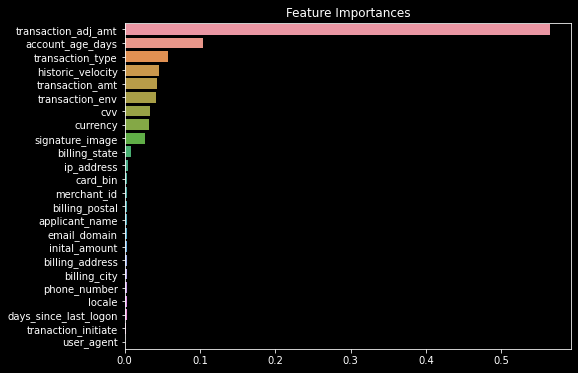

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:30]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=5)
plt.show()

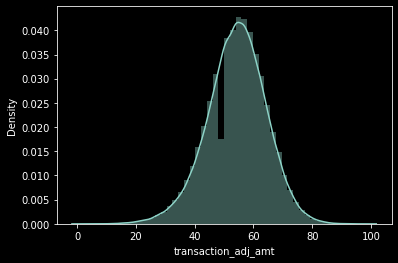

In [32]:
# ▶ 중요변수 1번에 대한 상세 탐색

sns.distplot(df['transaction_adj_amt']);

In [33]:
# ▶ 구간화
import numpy as np
df['transaction_adj_amt_gp'] = np.where (df['transaction_adj_amt'] <= 40, 1, 
                           np.where(df['transaction_adj_amt'] <= 60, 2, 3))

df[['transaction_adj_amt','transaction_adj_amt_gp']]

transaction_adj_amt  transaction_adj_amt_gp
0                      56.0                       2
1                      48.0                       2
2                      61.0                       3
3                      28.0                       1
4                      66.0                       3
...                     ...                     ...
149995                 57.0                       2
149996                 61.0                       3
149997                 48.0                       2
149998                 59.0                       2
149999                 68.0                       3

[147000 rows x 2 columns]

In [34]:
df.groupby(['transaction_adj_amt_gp', 'EVENT_LABEL'])['EVENT_TIMESTAMP'].count()

transaction_adj_amt_gp  EVENT_LABEL
1                       fraud           4628
                        legit           8072
2                       fraud           3131
                        legit          92394
3                       fraud            245
                        legit          38530
Name: EVENT_TIMESTAMP, dtype: int64

In [35]:
# ▶ 조정된 금액이 작을수록 사기거래 확률이 급격시 상승한다. (※ Critical한 변수).
print("gp1 :", (4628 / (4628+8072)) * 100)
print("gp2 :", (3131 / (3131+92394)) * 100)
print("gp3 :", (245 / (245+38530)) * 100)

gp1 : 36.44094488188976
gp2 : 3.277676001046846
gp3 : 0.6318504190844616



### · 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfc)

# 모델 Read
clf_from_pickle = pickle.loads(saved_model)